# **LINEAR REGRESSION**
_______
This notebook applies Linear Regression techniques to analyze weather conditions in Texas. Our goal is to predict continuous variables such as daily maximum temperature based on other weather-related features. We'll begin with simple linear regression and progress to more advanced models like multiple linear regression to evaluate performance and gain insights into the factors influencing temperature, humidity and other features of the data fluctuations.

### **Objectives of this Notebook**
- Comprehend the basic concept of linear regression.
- Peform data exploration and visualization
- Explore feature relationships with a simple linear regreassion model
- Build multiple linear regression model to predictions

______


## **Installing and Importing the required packages**

The packages used for this note book include:

- Pandas : This for data loading and data manipulation.
- Numpy : This is for numericl operations and arrays
- Matplotlib : This is assits with ploting graphs
- Seaborn : This is for more advanced data visualisations

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## **Data Exploration**

In order to perform a meaningful analysis, it's important to first explore the data. This helps us understand its structure, spot any issues, and determine whether it needs cleaning or adjustments to align with our objectives.

### Locate the data

With the help of the pandas library we can identify and read the data

In [4]:

df = pd.read_csv('../../weather_data.csv')

### Exposing a bit of the data

Printing just the five rows of the data gives a summerised overview of how the csv looks. It also confirms that the data has been succesfully read by the pandas library.

In [5]:
# Check Data Information

print (f"First five rows of the data \n {df.head()}")




First five rows of the data 
          date  max_temp  min_temp  humidity  wind_speed  precipitation  \
0  2019-01-01      87.5      59.5      67.2         8.3           0.07   
1  2019-01-02      84.7      72.4      75.4        10.8           0.14   
2  2019-01-03      88.9      65.2      79.2        12.2           0.07   
3  2019-01-04      93.6      66.1      75.2        13.0           0.05   
4  2019-01-05      85.2      69.9      70.0        10.2           0.05   

   pressure  solar_radiation  
0    1013.2            273.3  
1    1013.6            265.2  
2    1011.0            312.8  
3    1014.4            232.4  
4    1013.2            280.9  


### Listing the columns of the data set

The columns in this data set are as follows;

In [6]:
print (f"Data columns \n {df.columns}")

Data columns 
 Index(['date', 'max_temp', 'min_temp', 'humidity', 'wind_speed',
       'precipitation', 'pressure', 'solar_radiation'],
      dtype='object')


### Understanding what data type each data feature is stored as

This is very important in order to avoid errors later when data is not in the required format for analysis or further exploartion. 'info()' is a tool that makes this possible.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             1826 non-null   object 
 1   max_temp         1826 non-null   float64
 2   min_temp         1826 non-null   float64
 3   humidity         1826 non-null   float64
 4   wind_speed       1826 non-null   float64
 5   precipitation    1826 non-null   float64
 6   pressure         1826 non-null   float64
 7   solar_radiation  1826 non-null   float64
dtypes: float64(7), object(1)
memory usage: 114.2+ KB


The data type for the date is not fovourable. Hence I will be changing it to a datetime format.

In [8]:
# Changing the data type and confirming the changes

df['date'] = pd.to_datetime(df['date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             1826 non-null   datetime64[ns]
 1   max_temp         1826 non-null   float64       
 2   min_temp         1826 non-null   float64       
 3   humidity         1826 non-null   float64       
 4   wind_speed       1826 non-null   float64       
 5   precipitation    1826 non-null   float64       
 6   pressure         1826 non-null   float64       
 7   solar_radiation  1826 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 114.2 KB


Date has succesfully been changed. Now, to peform a doble check.

In [9]:
df.head()

,date,max_temp,min_temp,humidity,wind_speed,precipitation,pressure,solar_radiation
0,2019-01-01,87.5,59.5,67.2,8.3,0.07,1013.2,273.3
1,2019-01-02,84.7,72.4,75.4,10.8,0.14,1013.6,265.2
2,2019-01-03,88.9,65.2,79.2,12.2,0.07,1011.0,312.8
3,2019-01-04,93.6,66.1,75.2,13.0,0.05,1014.4,232.4
4,2019-01-05,85.2,69.9,70.0,10.2,0.05,1013.2,280.9


### Checking the number of data features

This allows one to see the full extent of the data that is being worked with.

In [10]:
# Checking number of rows per column
df.isnull().count()

date               1826
max_temp           1826
min_temp           1826
humidity           1826
wind_speed         1826
precipitation      1826
pressure           1826
solar_radiation    1826
dtype: int64

## **Data Cleaning**

Data Cleaning involves handling missing values, correcting data types, removing duplicates, and fixing inconsistencies to ensure the dataset is accurate, consistent, and ready for analysis.

### Exposing Null Values

This is a data cleaning technique, whereby empty or null values are shown in order to be removed. This will help make the dataset as clean as possible to wotk with.

In [11]:
# Checking number of null values per column
df.isnull().sum()


date               0
max_temp           0
min_temp           0
humidity           0
wind_speed         0
precipitation      0
pressure           0
solar_radiation    0
dtype: int64

There are no null values in the dataset

### Checking for duplicates in the dataset

Duplicates can really cause some data redunduncy. It is important to ensure there are no dulicates in order not to wrongly influence the model.

In [12]:
# Making dure there are no dulicates

duplicates = df.duplicated().sum()
print(f"Number of duplicates in the dataset: {duplicates}")


Number of duplicates in the dataset: 0


The data seems clean enough. And all the information here is relevant to our task so I would not be removing any columns

## **Feature Distributions**

Distributions of Features
 One of the most important steps in exploratory data analysis is figuring out how each feature is distributed.  It assists in locating skewness, outliers, and trends in the data.

  Histograms help us identify broad patterns or odd forms by providing a visual summary of each feature's frequency distribution.

  Box plots are helpful for evaluating distributions across characteristics and identifying outliers.

  By quickly displaying both distributions and correlations, pair plots enable us to investigate the relationships between pairs of variables.

Choices about scaling, handling outliers, and data transformation are informed by these representations.

## Histogram Presentation of All the Features  of the Data



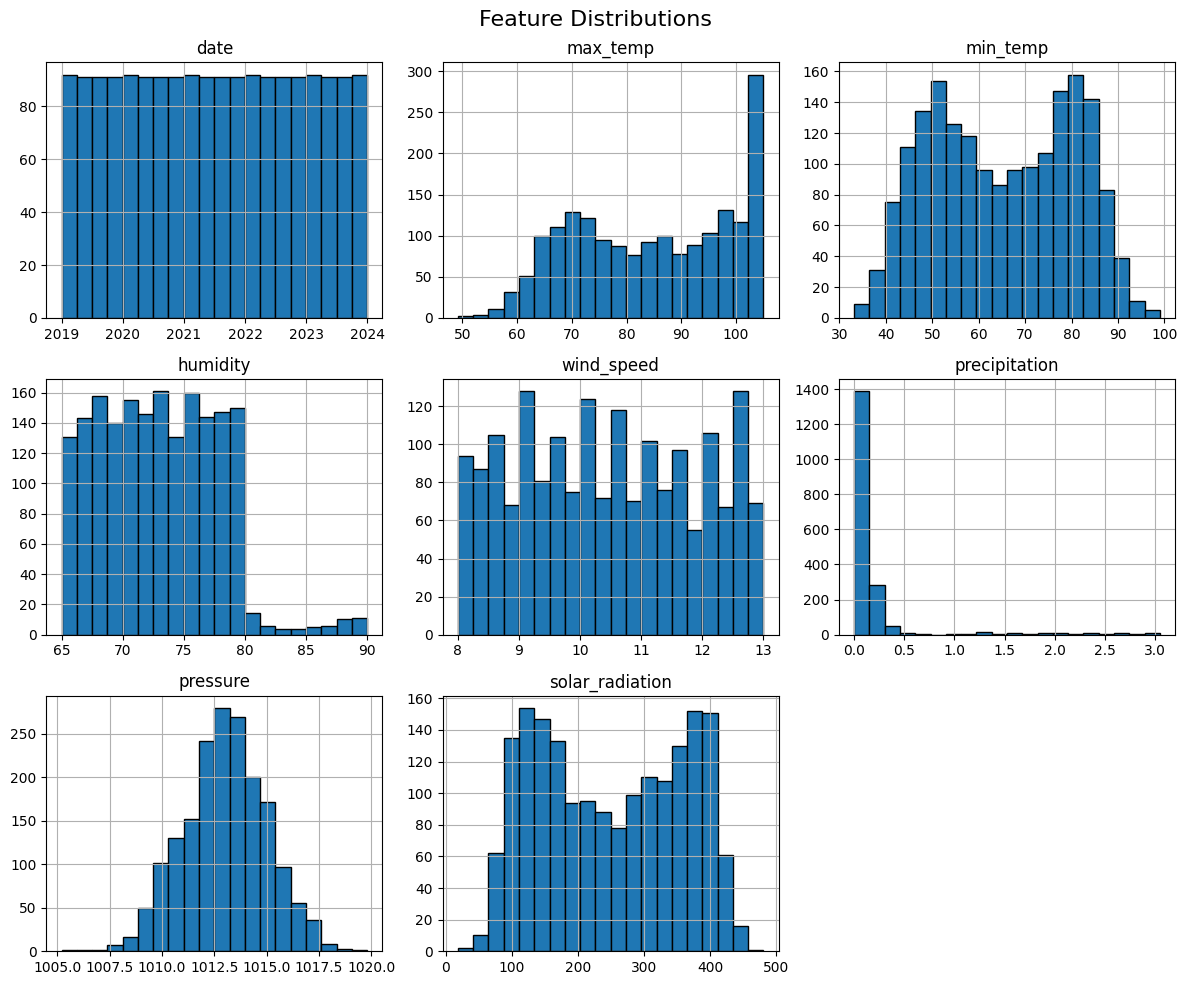

In [13]:
# Histogram to show the feature distribution of everything

df.hist(bins=20, figsize=(12, 10), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

### **Summary of the histogram presentations**
- **Date:** The data spans evenly from 2019 to 2024, indicating a well-distributed time series without major gaps.

- **Max Temp & Min Temp:** Both temperature features show a strong right peak, especially max temperature, suggesting a high frequency of hot days. The distributions are somewhat skewed, possibly due to seasonal trends or regional climate patterns.

- **Humidity:** Shows a concentration around 65–75%, but also an odd drop-off between 75–85%, followed by a small spike near 90%. This may hint at either data recording quirks or distinct weather conditions.

- **Wind Speed:** Fairly uniform distribution with no extreme outliers, indicating consistent wind conditions across the recorded period.

- **Precipitation:** Highly right-skewed, with most days showing little to no rainfall. A small number of days experience significant precipitation, suggesting occasional heavy rain events.

- **Pressure:** Appears normally distributed, centered around 1012–1013 hPa, which is typical for atmospheric pressure at sea level.

- **Solar Radiation:** Bimodal distribution, which suggests that  two dominant lighting conditions. This could possibly be representing cloudy vs. sunny days.

## Boxplot Presentation of All the Features  of the Data, but Date and Time


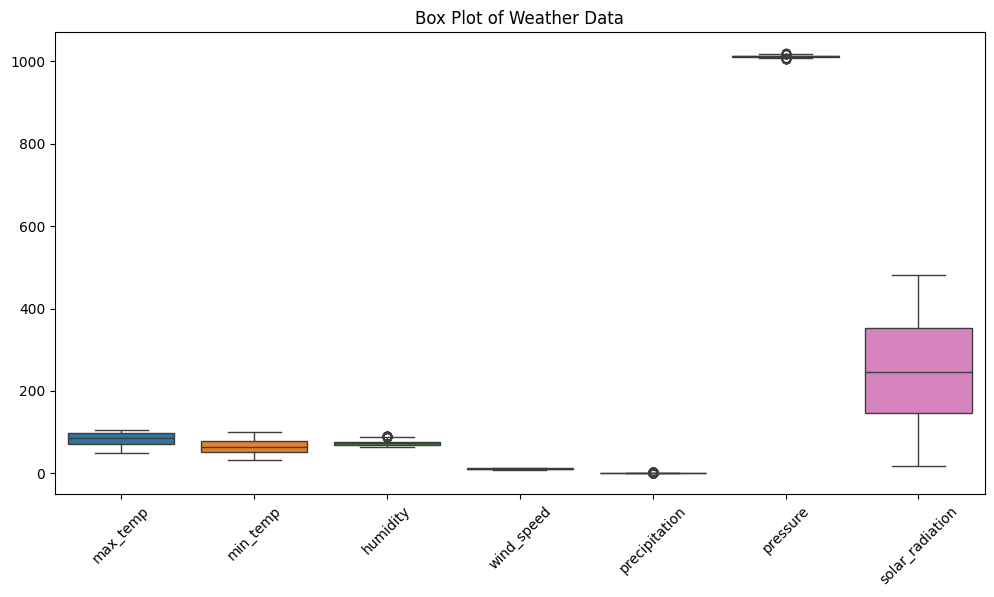

In [14]:
# Let's us do a boxplot and see if we can spot outliers, even tho from the histogram we do suspect that from some of the features

plt.figure(figsize =(12, 6))
sb.boxplot(data=df)
plt.title("Box Plot of Weather Data")
plt.xticks(rotation=45)
plt.show()

### **Summary of the boxplot presentations**
- **Max Temp & Min Temp:** The distributions of both temperature variables are moderately scattered and reasonably symmetrical. The temperatures are generally constant, with a few mild outliers

- **Humidity:** Slightly wider spread with visible outliers, suggesting occasional spikes or dips in humidity levels that deviate from the typical range.

- **Wind Speed:** Fairly compact distribution, with minimal outliers, indicating stable wind patterns across the dataset.

- **Precipitation:** This feature has clear outliers. Most values are near zero, but there are a few extreme days with high rainfall, confirming the right-skewed distribution seen earlier.

- **Pressure:** Very tight distribution with almost no outliers, showing consistent atmospheric pressure throughout the dataset.

- **Solar Radiation:** Large range and a few high outliers. This wide spread supports the earlier observation of bimodality, possibly due to varying sunlight exposure across seasons or weather conditions.

## Pair Plot Presentation of All the Features  of the Data, but Date and Time


<function matplotlib.pyplot.show(close=None, block=None)>

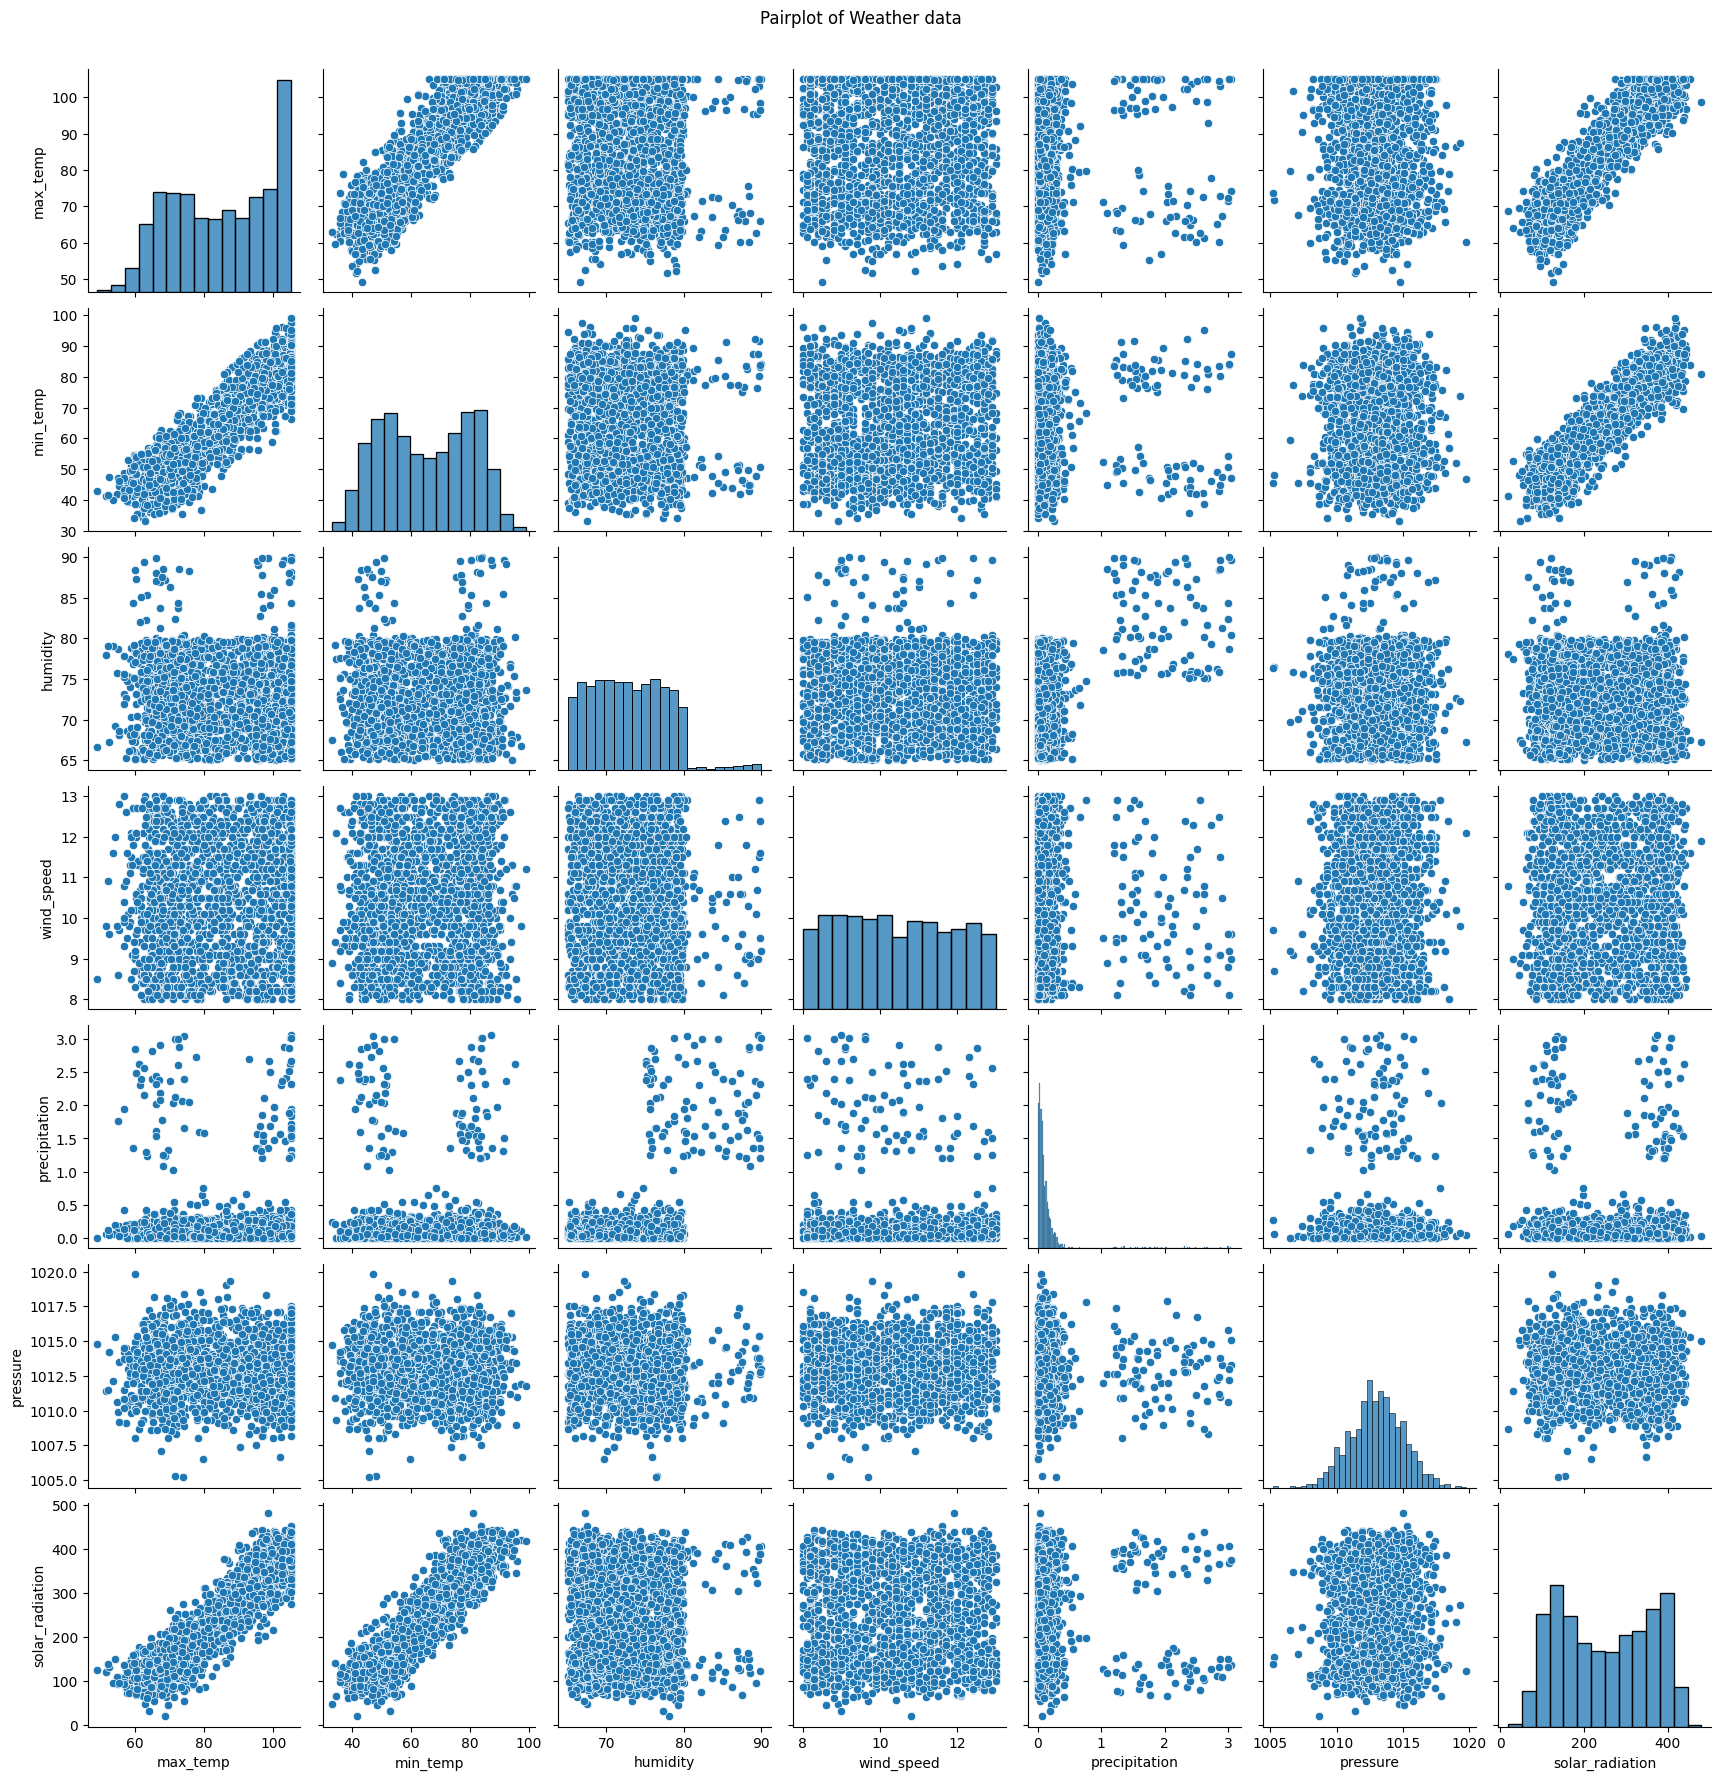

In [15]:
# Let's check the relationships between each feature in the data

sb.pairplot(df[['max_temp', 'min_temp', 'humidity', 'wind_speed','precipitation', 'pressure', 'solar_radiation']])
plt.suptitle("Pairplot of Weather data", y=1.02)
plt.show

### **Summary of the Pair Plot presentations**
**1. Strong Positive Correlation**

max_temp and min_temp show a strong positive linear correlation—makes sense, hotter days have warmer minimum temperatures.

**2. No Clear Relationship**

Many scatter plots (like humidity vs wind_speed, or solar_radiation vs pressure) look like clouds of points — this indicates no strong linear relationship.

**3. Distributions**

On the diagonals, humidity is centered around 60–80%—possibly a normally distributed or left-skewed.

And on precipitation, it is heavily right-skewed which means; many days with 0 or low precipitation, a few with high.

solar_radiation shows peaks, possibly multimodal or seasonal variation.

**4. Other Notable Patterns**

solar_radiation and max_temp show a loose positive trend (brighter days are warmer).

wind_speed seems fairly uniformly distributed.

## **Simple Linear Regression**

**Simple Linear Regression** is one of the most basic types of predictive modeling techniques. It models the relationship between two variables:

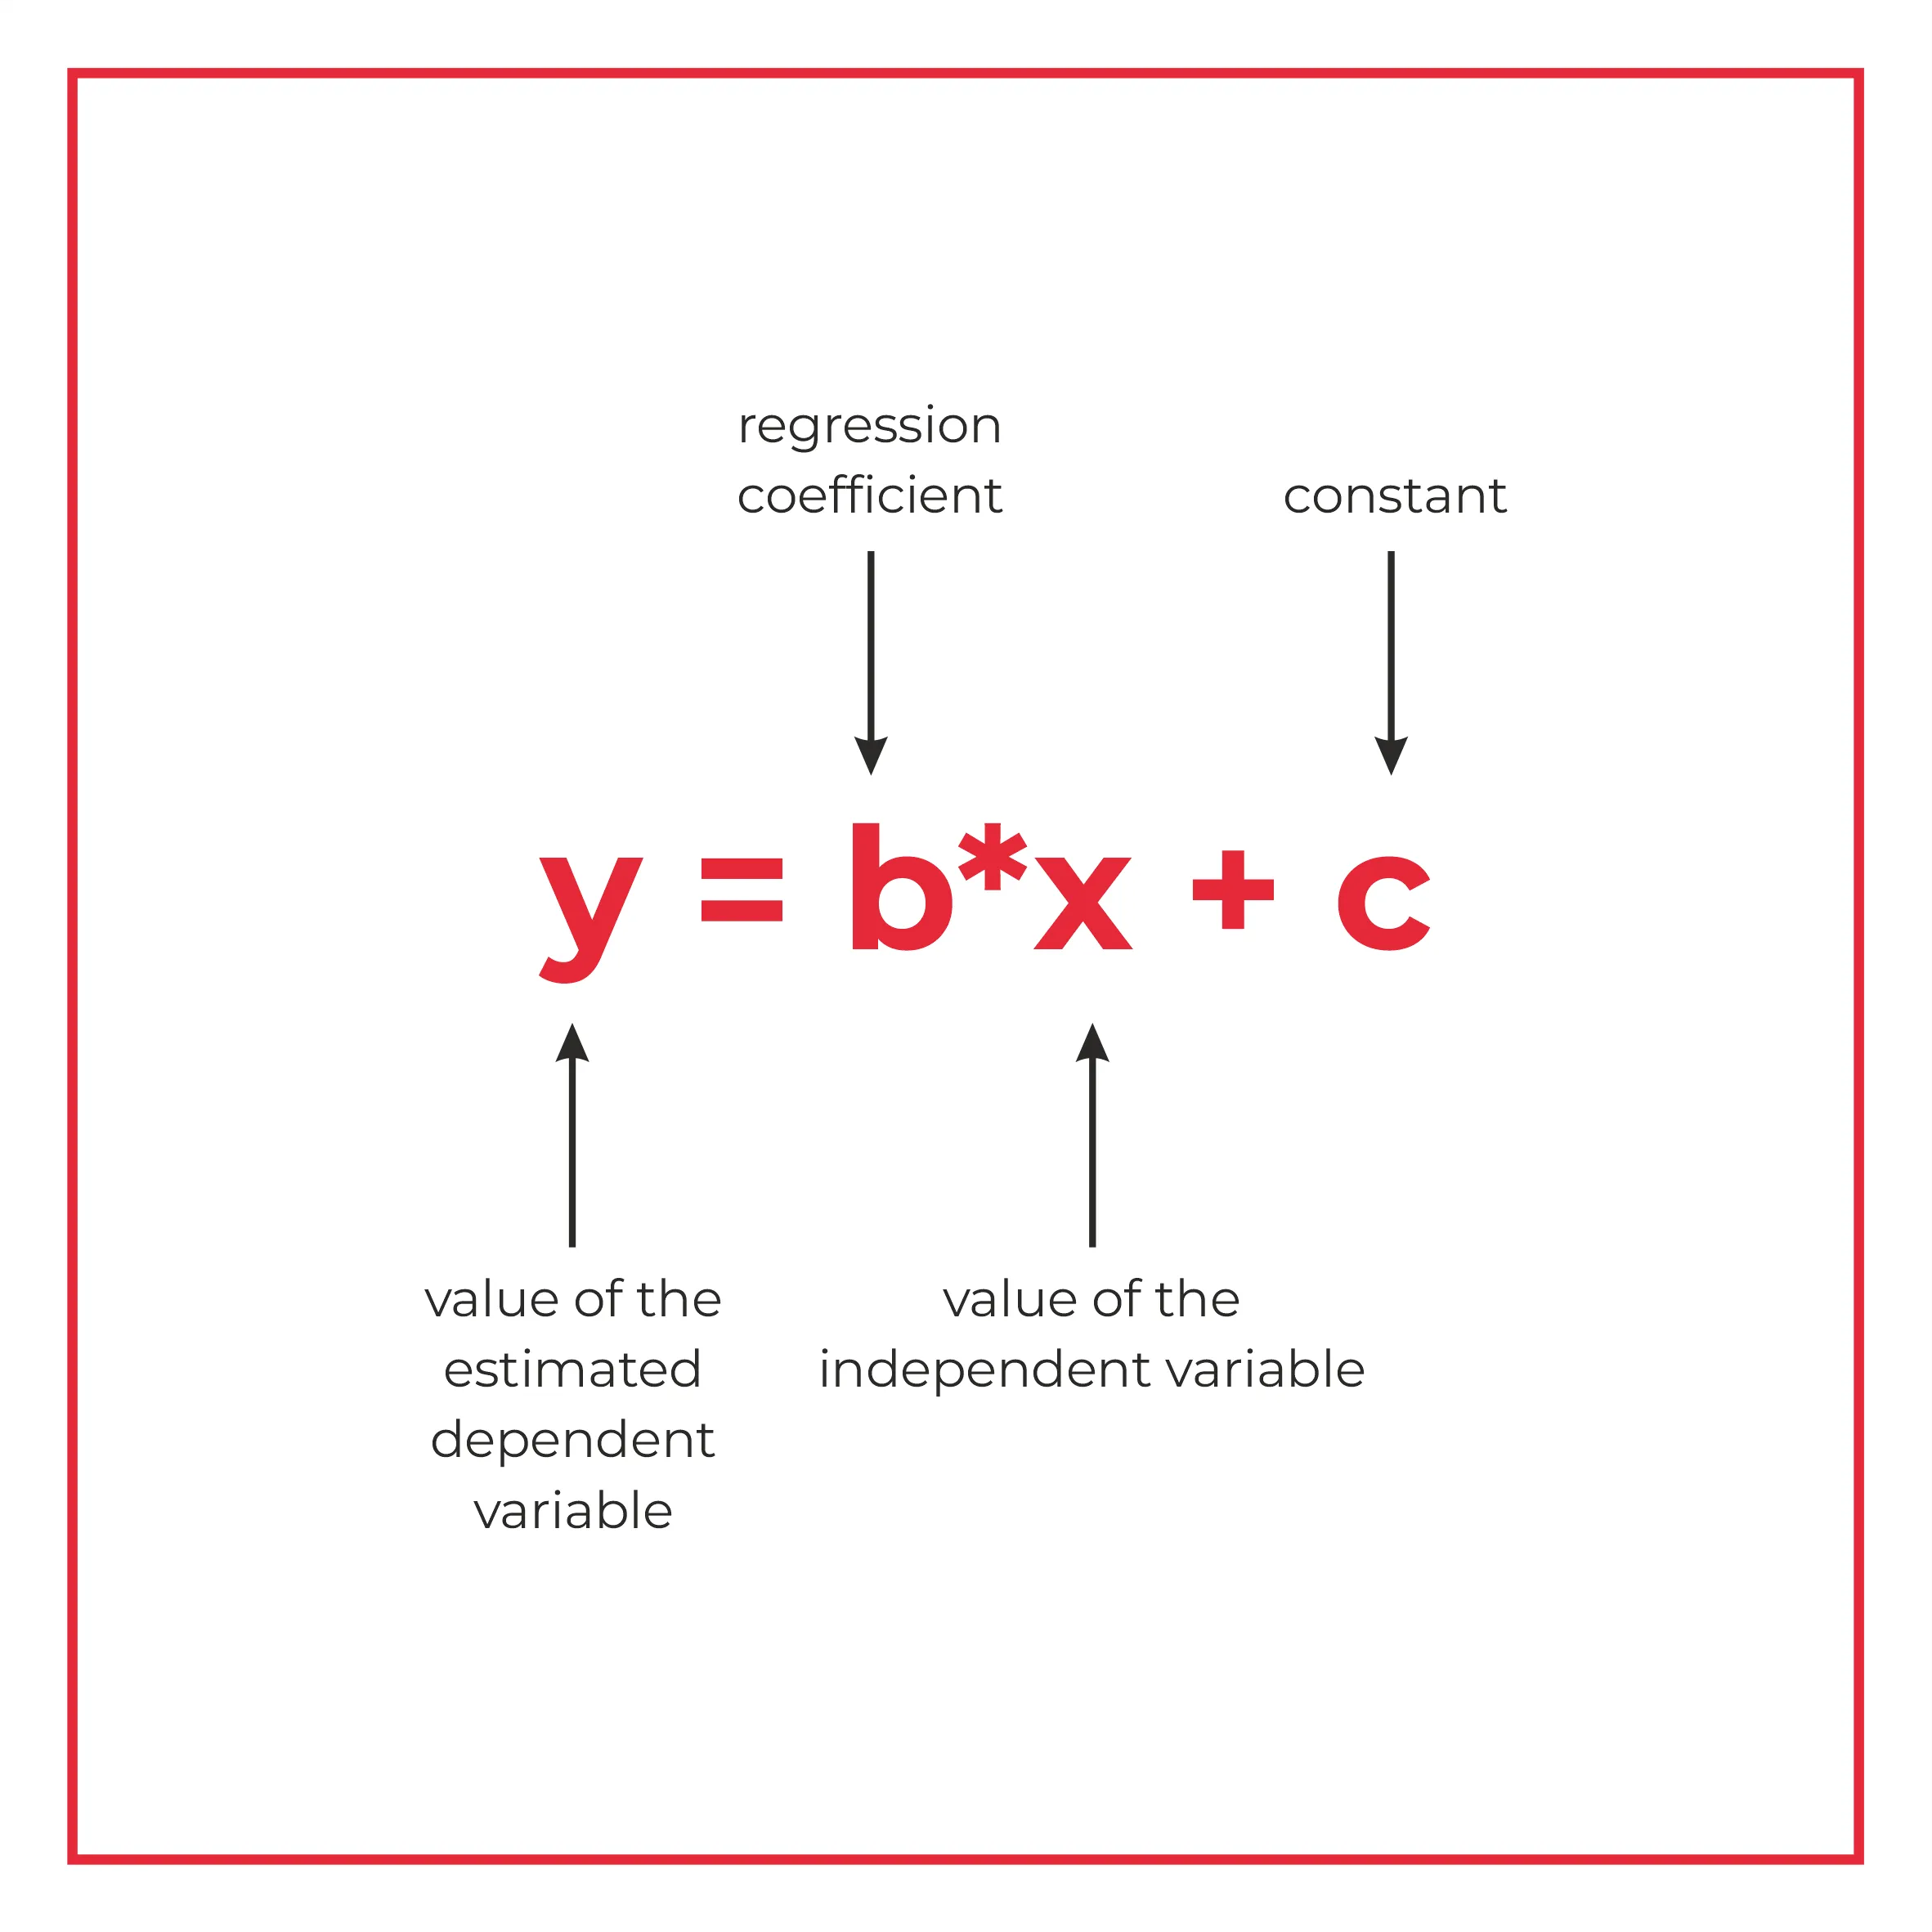



- **One independent variable (X)** – the predictor or input.
- **One dependent variable (Y)** – the target or output.

The goal is to fit a straight line through the data that best describes how the independent variable influences the dependent one. This line is represented by the equation:

\[
Y = a + bX
\]

Where:  
- `a` is the **intercept** (value of Y when X = 0)  
- `b` is the **slope** (how much Y changes for a unit change in X)  

Simple Linear Regression is useful for understanding trends and making predictions when there's a clear linear relationship between two variables.


### **Summary of the code below**

In this section, we're manually performing simple linear regression to explore the relationship between **humidity** (X) and **max temperature** (Y).

- We define `x` and `y` as the predictor and target variables.
- We calculate the **slope (`beta1`)** and **intercept (`beta0`)** using the formulas for linear regression.
- Using these, we compute predicted values (`y_pred`) and evaluate the model using **R² (coefficient of determination)**, which tells us how well the model explains the variability in the data.

This gives us the regression equation and an idea of how strongly humidity is related to max temperature.


In [16]:
# Let's explore the relationship between some variable using simple linear regression

#Let's difine x and y
x= df['humidity']
y = df['max_temp'] 

# Calculate slope and intercept manually
x_mean, y_mean = x.mean(), y.mean()
beta1 = ((x - x_mean) * (y - y_mean)).sum() / ((x - x_mean)**2).sum()
beta0 = y_mean - beta1 * x_mean

# Predict and calculate R²
y_pred = beta0 + beta1 * x
r_squared = 1 - ((y - y_pred)**2).sum() / ((y - y_mean)**2).sum()

print(f"y = {beta0:.2f} + {beta1:.2f}x")
print(f"R² = {r_squared:.4f}")

y = 89.31 + -0.06x
R² = 0.0004


**Interpretation of the Output:**

0.0004 = only 0.04% of the variability in max temperature can be explained by humidity.


**Interpretation of the slope:**

For every 1% increase in humidity, max temperature drops by 0.06 degrees.

But since the R² is so low, this tiny slope probably isn’t meaningful—it could just be noise.





### Giving simple Linear Regression another try with strongly related features

max_temp and min_temp are stongly related. This is just to see how a simple linear regression can show how stronlgy related these two variables are.

In [17]:
# We know tht there is a strong relationship between minimum temprauture and mazimum temperature from thr pair plot, but let's see if we can use linear regression to show that too

#Let's difine x and y
x= df['min_temp']
y = df['max_temp'] 

# Calculate slope and intercept manually
x_mean, y_mean = x.mean(), y.mean()
beta1 = ((x - x_mean) * (y - y_mean)).sum() / ((x - x_mean)**2).sum()
beta0 = y_mean - beta1 * x_mean

# Predict and calculate R²
y_pred = beta0 + beta1 * x
r_squared = 1 - ((y - y_pred)**2).sum() / ((y - y_mean)**2).sum()

print(f"y = {beta0:.2f} + {beta1:.2f}x")
print(f"R² = {r_squared:.4f}")


y = 28.85 + 0.86x
R² = 0.8132


**Interpretation of Regression Output**

- **Regression Equation:**  
  \[
  y = 28.85 + 0.86x
  \]  
  This means that for every 1 unit increase in **humidity**, the **maximum temperature** increases by approximately **0.86 degrees**, on average.  
  The value **28.85** is the intercept — the predicted max temperature when humidity is 0 
  
- **R² = 0.8132:**  
  The **R-squared value** indicates that **81.32%** of the variation in max temperature can be explained by the humidity.  
  This suggests a **strong linear relationship** between the two variables.

### Giving Simple Linear Regression another try: Discovering relationship max_temp and solar_radiation

In this section, Simple Linear will be used to discover the relationship between maximum temperature and solar radiation

In [18]:
# Let'stry with another

#Let's difine x and y
x= df['max_temp']
y = df['solar_radiation'] 

# Calculate slope and intercept manually
x_mean, y_mean = x.mean(), y.mean()
beta1 = ((x - x_mean) * (y - y_mean)).sum() / ((x - x_mean)**2).sum()
beta0 = y_mean - beta1 * x_mean

# Predict and calculate R²
y_pred = beta0 + beta1 * x
r_squared = 1 - ((y - y_pred)**2).sum() / ((y - y_mean)**2).sum()

print(f"y = {beta0:.2f} + {beta1:.2f}x")
print(f"R² = {r_squared:.4f}")

y = -342.73 + 6.97x
R² = 0.8500


**Interpretation of Regression Output**

- **Regression Equation:**  
  \[
  y = -342.73 + 6.97x
  \]  
  This equation suggests that for every **1 unit increase in x**, the predicted value of **y** increases by approximately **6.97 units**.  
  The **intercept (-342.73)** represents the predicted value of **y when x = 0**. While this value may not be meaningful in a real-world context (e.g., negative temperature), it’s mathematically necessary for the regression equation.

- **R² = 0.8500:**  
  The **R-squared value** of **0.85** means that **85% of the variation in y** can be explained by changes in **x**.  
  This indicates a **very strong linear relationship** between the two variables — the model fits the data well.


## **Multiple Linear Regression**

**Multiple Linear Regression** is an extension of simple linear regression. Instead of using just one independent variable (predictor), it uses **two or more** to predict a single dependent variable (target).

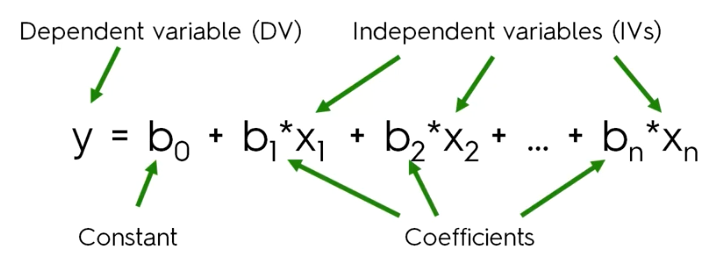

The general form of the equation is:

\[
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_nX_n
\]

Where:  
- \( Y \) is the dependent variable  
- \( X_1, X_2, ..., X_n \) are the independent variables  
- \( \beta_0 \) is the intercept  
- \( \beta_1, \beta_2, ..., \beta_n \) are the coefficients showing the impact of each predictor on \( Y \)

**Key purposes of multiple linear regression:**
- Understand how multiple factors together influence the target variable.
- Identify the most significant predictors.
- Make predictions based on a combination of inputs.

It's important to check for things like **multicollinearity**, **outliers**, and **assumptions of linearity**, as they can affect the model's performance.


### Using Multiple Liner Regression to Predict Maximum Temperature

**Multiple predictors:**

The variable X includes more than one feature (humidity, wind_speed, and solar_radiation), making this a multiple linear regression.

**Single target:**

We're still predicting one outcome (max_temp), but based on multiple inputs.

**Model output:**

After fitting, we get the intercept, coefficients (one for each input feature), and R², which shows how well all predictors together explain the target variable.

In [19]:
# Let's try some multiple Linear Regression

X = df[['min_temp', 'humidity', 'wind_speed', 'solar_radiation']].values
y = df['max_temp'].values

# Add intercept
X_b = np.c_[np.ones((X.shape[0], 1)), X]
beta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Predict and R²
y_pred = X_b @ beta
r_squared = 1 - ((y - y_pred)**2).sum() / ((y - y.mean())**2).sum()

print("R² for predicting maximum temperature:", r_squared)

R² for predicting maximum temperature: 0.8683837006639915


**Interpretation of R² Output**

- **R² = 0.8684** means that approximately **86.84%** of the variation in **maximum temperature** can be explained by the combination of the predictors: **humidity**, **wind speed**, and **solar radiation**.
  
- This indicates a **strong model fit**, which suggests that these three variables together do a good job of predicting max temperature.

- The closer R² is to **1**, the better the model explains the data. An R² of **0.8684** shows that the model captures most of the relevant patterns in the data, with only around **13%** of the variability left unexplained.


### Predicting Humidity with Multilinear Regression 

In [20]:
# Let's try changing the target to humididty now

X = df[['max_temp', 'min_temp', 'wind_speed', 'pressure']]
y = df['humidity']

X_b = np.c_[np.ones((X.shape[0], 1)), X]
beta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
y_pred = X_b @ beta

r_squared = 1 - ((y - y_pred)**2).sum() / ((y - y.mean())**2).sum()
print("R² for predicting humidity:", r_squared)

R² for predicting humidity: 0.00461953976959284


**Interpretation of R² Output (Predicting Humidity)**

- **R² = 0.0046** means that the model explains **only about 0.46%** of the variation in **humidity** using the given predictors.

- This is a **very low R²**, indicating that the chosen independent variables have **almost no predictive power** for humidity.

- In other words, the model is **not effective** at predicting humidity so, the relationship between the predictors and humidity is either weak, non-linear, or possibly influenced by other unaccounted factors.

- It may be worth exploring other features, using non-linear models, or checking for data issues to improve predictive performance.


## **Conclusion ad Final Notes**


In this notebook, we explored both **Simple** and **Multiple Linear Regression** techniques to understand relationships between Texas weather variables.

- **Simple Linear Regression** helped us analyze the impact of a single feature (like humidity) on a target variable (like max temperature).
- **Multiple Linear Regression** allowed us to use multiple predictors to improve model accuracy and capture more complex relationships.

We also evaluated model performance using **R²**, which gave us insights into how well each model explains the variability in the target variable.

###  Final Notes:
- A high R² indicates a good fit, but it's also important to check residuals and assumptions of linearity.
- A low R² (as seen when predicting humidity) signals that other features or modeling approaches might be needed.
- Regression is a great starting point, but more advanced models may be explored for better performance if the data is complex or non-linear.

This analysis sets the foundation for deeper predictive modeling and feature engineering in future steps.
